In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Data Overview</h1>

In [2]:
df_netflix = pd.read_csv('netflix_titles.csv')

In [3]:
df_netflix.shape

(8807, 12)

In [4]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df_netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df_netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df_netflix.duplicated().sum()

0

In [8]:
df_netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [9]:
for i in df_netflix.columns:
    null_rate = df_netflix[i].isna().sum() / len(df_netflix) * 100
    if null_rate > 0:
        print("{} null rate: {}%".format(i, round(null_rate, 2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


<h1>Missing Null Values</h1>

In [10]:
df_netflix["director"] = df_netflix["director"].fillna("Unknown")
df_netflix["cast"] = df_netflix["cast"].fillna("Unknown")
df_netflix["country"] = df_netflix["country"].fillna(df_netflix["country"].mode()[0])
df_netflix["date_added"] = df_netflix["date_added"].fillna(df_netflix["date_added"].mode()[0])
df_netflix["rating"] = df_netflix["rating"].fillna("Unknown")
df_netflix["duration"] = df_netflix["duration"].fillna("Unknown")
df_netflix.dropna(inplace = True)
df_netflix.drop_duplicates(inplace = True)

In [11]:
df_netflix["date_added"] = df_netflix["date_added"].str.strip()
df_netflix["date_added"] = pd.to_datetime(df_netflix["date_added"], format="%B %d, %Y")

In [12]:
df_netflix["year_added"] = df_netflix["date_added"].dt.year
df_netflix["month_added"] = df_netflix["date_added"].dt.month
df_netflix['month_name_added']  = df_netflix['date_added'].dt.month_name()
df_netflix["day_added"] = df_netflix["date_added"].dt.day

In [13]:
df_netflix["country"] = df_netflix["country"].str.strip().str.lstrip(',').str.strip()

In [14]:
df_netflix.isna().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
year_added          0
month_added         0
month_name_added    0
day_added           0
dtype: int64

In [15]:
df_country_explode = df_netflix.assign(country = df_netflix["country"].str.split(', ')).explode('country')
df_country_explode.duplicated(subset = "show_id").sum()

2036

In [16]:
df_listed_in_explode = df_netflix.assign(listed_in = df_netflix["listed_in"].str.split(', ')).explode('listed_in')
df_listed_in_explode

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_name_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,September,25
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,September,24
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,9,September,24
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,9,September,24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,9,September,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero...",2020,1,January,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero...",2020,1,January,11
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019,3,March,2
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019,3,March,2


<h1>Type Analysis</h1>

<h3>Ratio of Movies and TV Shows</h3>

In [17]:
x = df_netflix["type"].value_counts()
y = len(df_netflix)
r = ((x/y)).round(2)
mf_ratio = pd.DataFrame(r).T
print(r)
mf_ratio

type
Movie      0.7
TV Show    0.3
Name: count, dtype: float64


type,Movie,TV Show
count,0.7,0.3


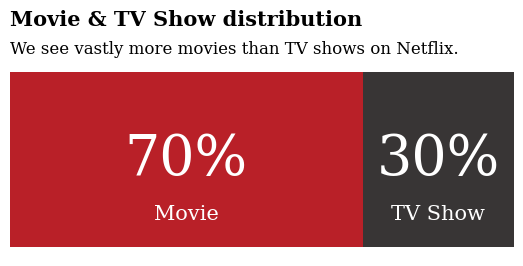

In [18]:
fig, ax = plt.subplots(1,1, figsize = (6.5, 2.5))
ax.barh(mf_ratio.index, mf_ratio['Movie'], color = '#b20710', alpha = 0.9, label = 'Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left = mf_ratio['Movie'], color = '#221f1f', alpha = 0.9, label = 'Female')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12) 

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.legend().set_visible(False)
plt.show()

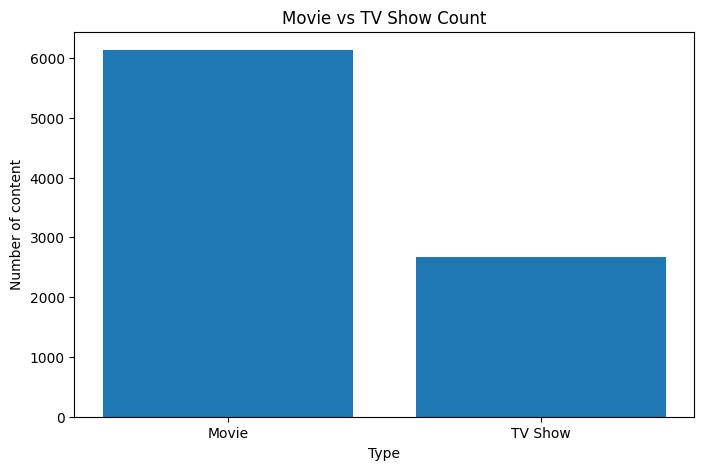

In [19]:
type = df_netflix["type"].value_counts()
plt.figure(figsize = (8,5))
plt.bar(type.index, type.values)
plt.title("Movie vs TV Show Count")
plt.xlabel("Type")
plt.ylabel("Number of content")
plt.show()

<h1>Director Analysis</h1>

In [20]:
df_netflix["director"].value_counts()

director
Unknown                           2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

In [21]:
df_netflix.groupby(["director", "type"]).size().reset_index(name = "count")

,director,type,count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
...,...,...,...
4573,Çagan Irmak,Movie,1
4574,Ísold Uggadóttir,Movie,1
4575,Óskar Thór Axelsson,Movie,1
4576,Ömer Faruk Sorak,Movie,2


In [22]:
df_netflix.groupby("director")["listed_in"].value_counts().groupby(level = 0).head(1)

director             listed_in                                                 
A. L. Vijay          Comedies, Dramas, International Movies                        1
A. Raajdheep         Dramas, International Movies                                  1
A. Salaam            Action & Adventure, International Movies, Music & Musicals    1
A.R. Murugadoss      Action & Adventure, International Movies                      1
Aadish Keluskar      Dramas, Independent Movies, International Movies              1
                                                                                  ..
Çagan Irmak          Dramas, International Movies                                  1
Ísold Uggadóttir     Dramas, Independent Movies, International Movies              1
Óskar Thór Axelsson  Horror Movies, International Movies                           1
Ömer Faruk Sorak     Dramas, International Movies, Romantic Movies                 1
Şenol Sönmez         Comedies, Dramas, International Movies           

<h1>Country Analysis</h1>

<h3>Content from different countries</h3>

In [23]:
df_country_explode['country'].replace('United States', 'USA', inplace=True)
df_country_explode['country'].replace('United Kingdom', 'UK',inplace=True)
df_country_explode['country'].replace('South Korea', 'S. Korea',inplace=True)

In [24]:
data = df_country_explode["country"].value_counts()[:10]

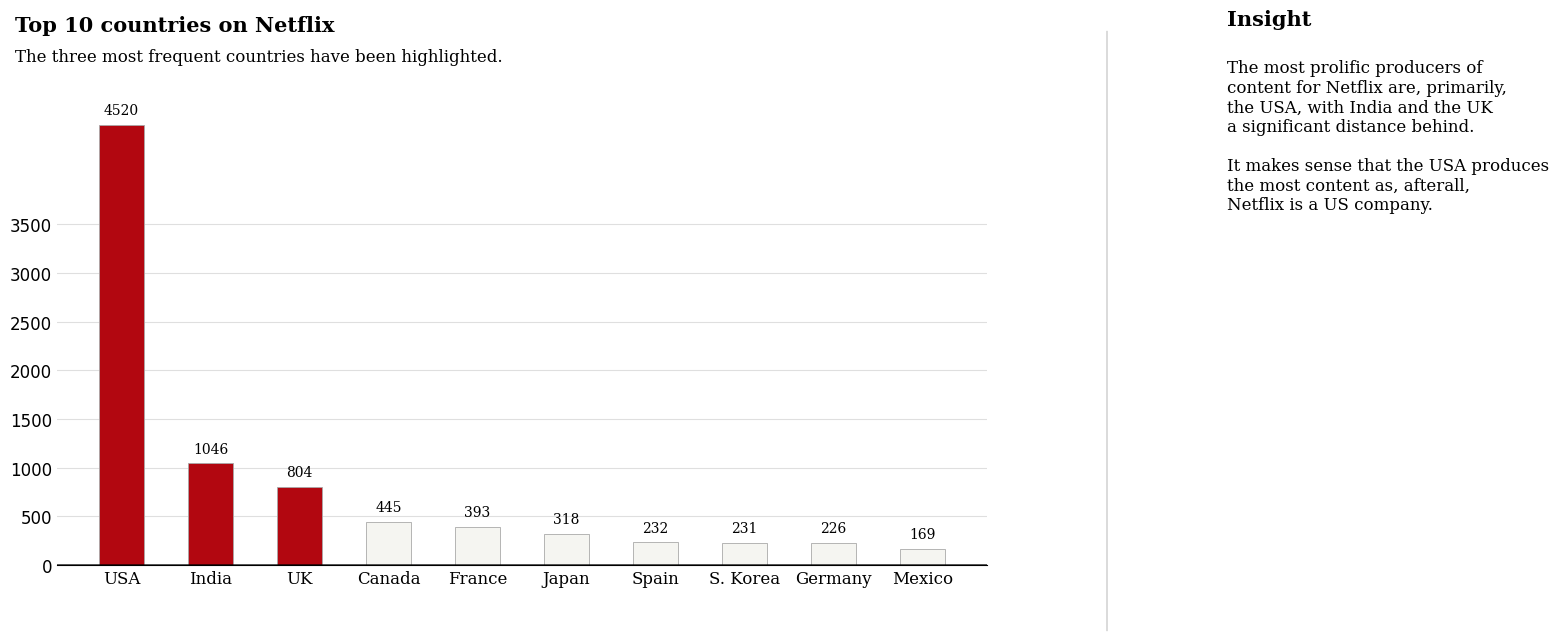

In [25]:
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710'
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.set_xticks(range(len(data.index)))
ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)
fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
The most prolific producers of
content for Netflix are, primarily,
the USA, with India and the UK
a significant distance behind.

It makes sense that the USA produces 
the most content as, afterall, 
Netflix is a US company.
''', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   
grid_y_ticks = np.arange(0, 4000, 500)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

# plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
# plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
# plt.legend(loc='upper right')

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


type             Movie  TV Show     sum
country                                
United States   2498.0   1151.0  3649.0
India            893.0     79.0   972.0
United Kingdom   206.0    213.0   419.0
Japan             76.0    169.0   245.0
South Korea       41.0    159.0   200.0
Canada           122.0     59.0   181.0
Spain             97.0     48.0   145.0
France            75.0     49.0   124.0
Mexico            70.0     40.0   110.0
Egypt             92.0     14.0   106.0
Turkey            76.0     29.0   105.0
type               Movie   TV Show
country                           
South Korea     0.205000  0.795000
Japan           0.310204  0.689796
United Kingdom  0.491647  0.508353
France          0.604839  0.395161
Mexico          0.636364  0.363636
Spain           0.668966  0.331034
Canada          0.674033  0.325967
United States   0.684571  0.315429
Turkey          0.723810  0.276190
Egypt           0.867925  0.132075
India           0.918724  0.081276


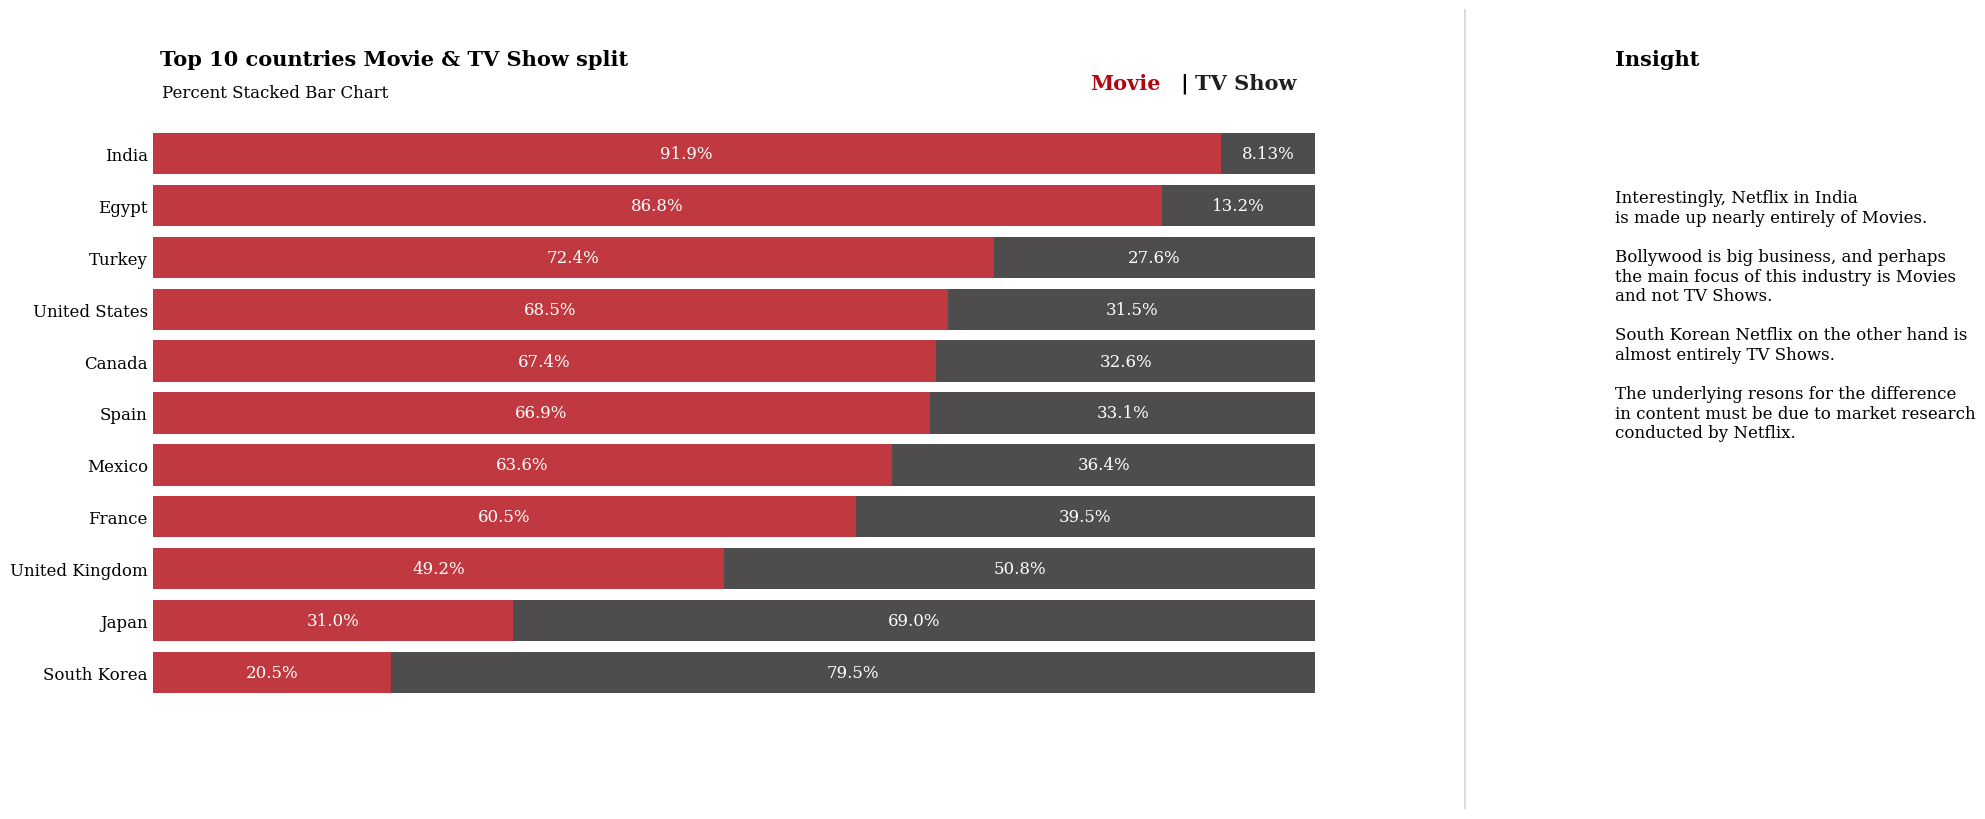

In [26]:
country_order = df_netflix['country'].value_counts()[:11].index
dataq2q3 = df_netflix[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
dataq2q3['sum'] = dataq2q3.sum(axis = 1)
print(dataq2q3)

data_q2q3_ratio = (dataq2q3.T / dataq2q3['sum']).T[['Movie', 'TV Show']].sort_values(by = 'Movie', ascending  = False)[::-1]
print(data_q2q3_ratio)
fig, ax = plt.subplots(1,1,figsize=(15, 8))
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks(data_q2q3_ratio.index)
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)


fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.44, '''
Interestingly, Netflix in India
is made up nearly entirely of Movies. 

Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.

South Korean Netflix on the other hand is 
almost entirely TV Shows.

The underlying resons for the difference 
in content must be due to market research
conducted by Netflix.
''' , fontsize=12, fontweight='light', fontfamily='serif')


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

<h1>Date Analysis</h1>

<h3>Growth in content over the years</h3>

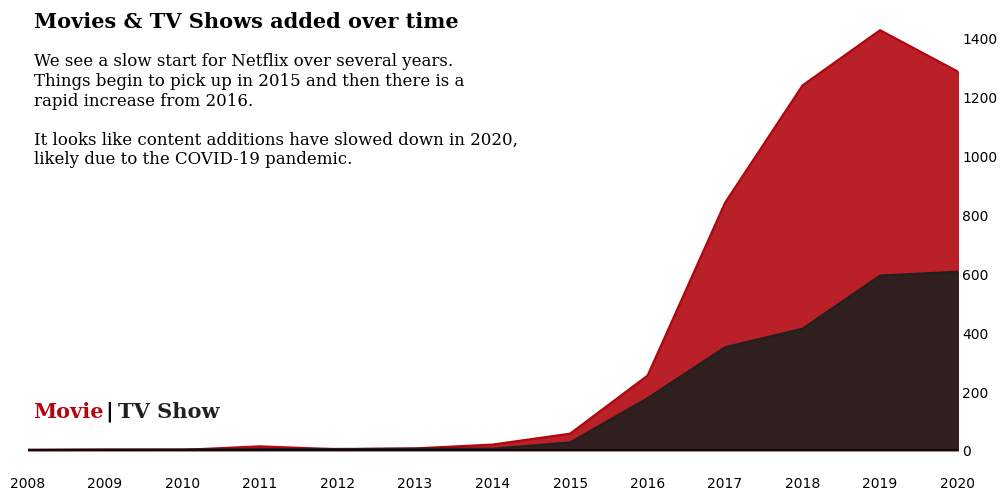

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]
for i, mtv in enumerate(df_netflix['type'].value_counts().index):
    mtv_rel = df_netflix[df_netflix['type'] == mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)

ax.yaxis.tick_right()
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.59, 
'''We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

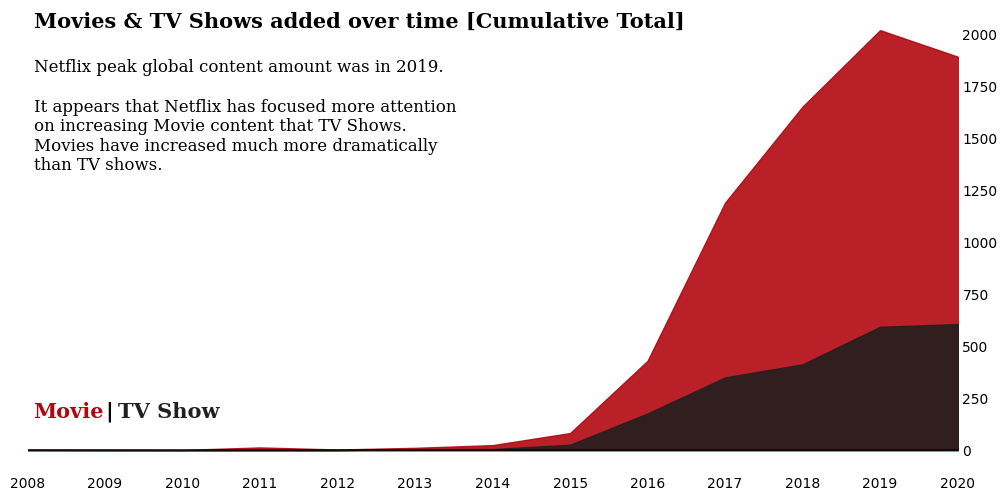

In [28]:
data_sub = df_netflix.groupby('type')['year_added'].value_counts().unstack().fillna(0).loc[['TV Show', 'Movie']].cumsum(axis = 0).T
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df_netflix['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)

ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.58, 
'''Netflix peak global content amount was in 2019.

It appears that Netflix has focused more attention
on increasing Movie content that TV Shows. 
Movies have increased much more dramatically
than TV shows.
'''

, fontsize=12, fontweight='light', fontfamily='serif')



fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

In [29]:
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']
df_netflix['month_name_added'] = pd.Categorical(df_netflix['month_name_added'], categories= month_order, ordered = True)

C:\Users\DUNYA\AppData\Local\Temp\ipykernel_10948\3226998271.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)


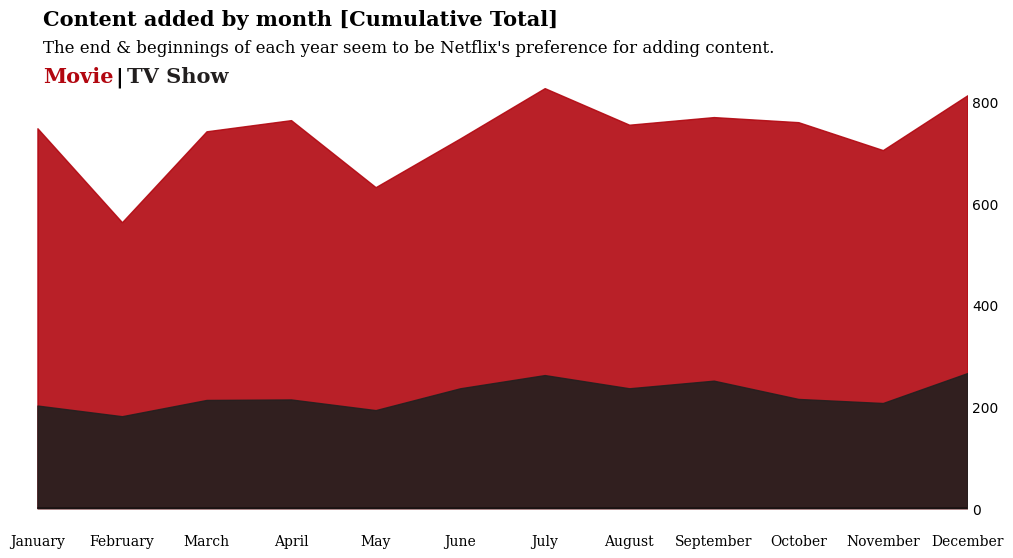

In [30]:
data_sub = df_netflix.groupby('type')['month_name_added'].value_counts().unstack().loc[['TV Show', 'Movie']].cumsum(axis = 0).T
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df_netflix['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)

ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0)

fig.text(0.13, 0.95, 'Content added by month [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.905, 
"The end & beginnings of each year seem to be Netflix's preference for adding content.", fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.13,0.855,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.855,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.855,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


In [31]:
df_netflix["month_added"].value_counts().sort_values(ascending = False).reset_index(name= "count")

,month_added,count
0,7,827
1,12,813
2,9,770
3,4,764
4,10,760
5,8,755
6,1,748
7,3,742
8,6,728
9,11,705


type month_name_added  TV Show  Movie  Value
0             January      202    748    950
1            February      181    563    744
2               March      213    742    955
3               April      214    764    978
4                 May      193    632    825
5                June      236    728    964
6                July      262    827   1089
7              August      236    755    991
8           September      251    770   1021
9             October      215    760    975
10           November      207    705    912
11           December      266    813   1079
type month_name_added  TV Show  Movie  Value
11           December      266    813   1079
10           November      207    705    912
9             October      215    760    975
8           September      251    770   1021
7              August      236    755    991
6                July      262    827   1089
5                June      236    728    964
4                 May      193    632    825
3         

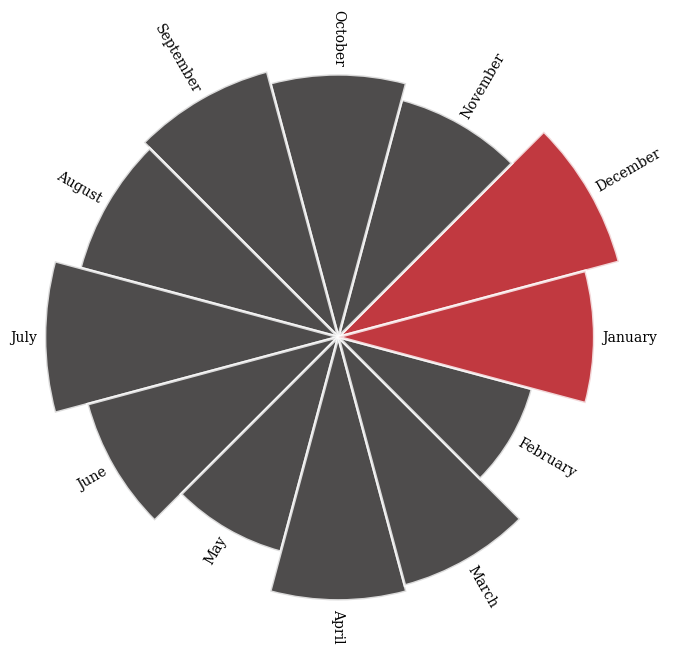

In [32]:
data_sub2 = data_sub
data_sub2['Value'] = data_sub2['Movie'] + data_sub2['TV Show']
data_sub2 = data_sub2.reset_index()
print(data_sub2)
df_polar = data_sub2.sort_values(by = 'month_name_added', ascending = False)
print(df_polar)
color_map = ['#221f1f' for _ in range(12)]
color_map[0] = color_map[11] =  '#b20710'

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

upperLimit = 30
lowerLimit = 1
labelPadding = 30

max = df_polar['Value'].max()

slope = (max - lowerLimit) / max
heights = slope * df_polar.Value + lowerLimit

width = 2*np.pi / len(df_polar.index)

indexes = list(range(1, len(df_polar.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,alpha=0.8
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_polar["month_name_added"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

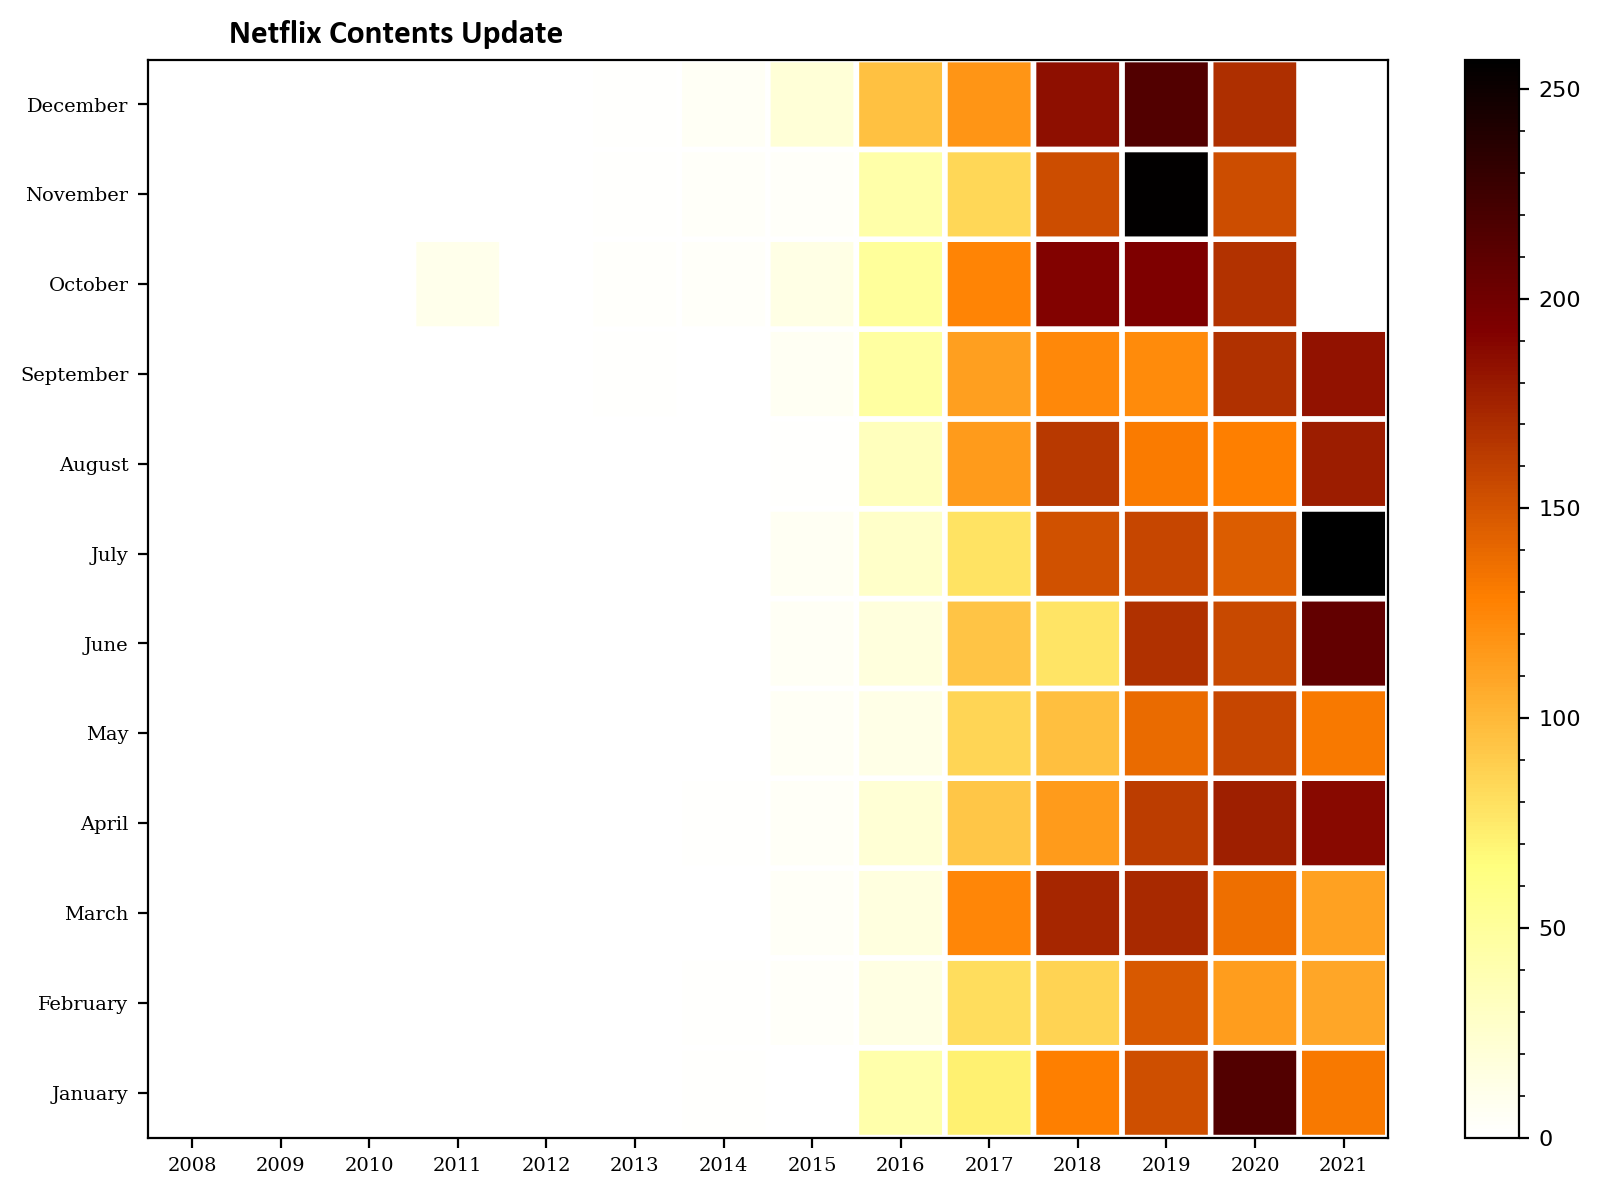

In [69]:
df = df_netflix.groupby('year_added')['month_name_added'].value_counts().unstack().fillna(0).T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

<h1>Listed In Analysis</h1>

C:\Users\DUNYA\AppData\Local\Temp\ipykernel_10948\56666921.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_categories.index, fontfamily='serif', rotation=20)


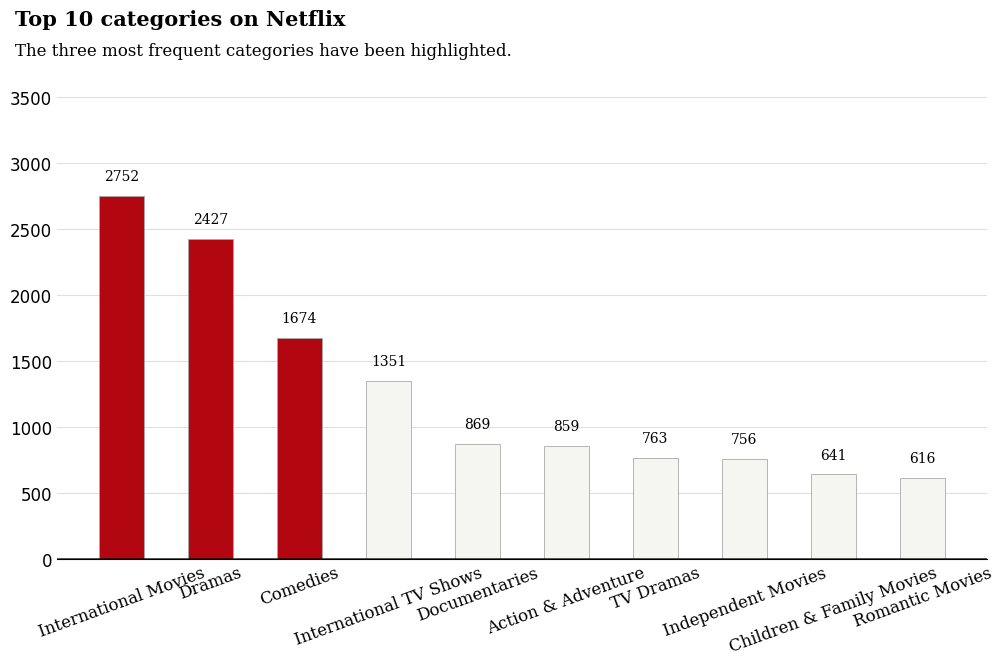

In [60]:
top_categories = df_listed_in_explode["listed_in"].value_counts().head(10)
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' 
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(top_categories.index, top_categories, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

for i in top_categories.index:
    ax.annotate(f"{top_categories[i]}", 
                   xy=(i, top_categories[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(top_categories.index, fontfamily='serif', rotation=20)
fig.text(0.09, 1, 'Top 10 categories on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent categories have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.4)   
grid_y_ticks = np.arange(0, 4000, 500)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [45]:
df_listed_in_explode.groupby("listed_in")["release_year"].value_counts().groupby(level=0).head(1).reset_index(name = "count").sort_values(by = "count",ascending = False)

,listed_in,release_year,count
16,International Movies,2018,340
12,Dramas,2018,304
17,International TV Shows,2020,214
7,Comedies,2018,178
10,Documentaries,2017,172
34,TV Dramas,2019,133
15,Independent Movies,2018,131
33,TV Comedies,2020,105
8,Crime TV Shows,2019,92
0,Action & Adventure,2017,89


In [46]:
df_listed_in_explode.groupby("listed_in")["date_added"].value_counts().groupby(level=0).head(1).reset_index(name = "count").sort_values(by = "count",ascending = False)

,listed_in,date_added,count
16,International Movies,2018-03-01,56
7,Comedies,2020-01-01,41
12,Dramas,2019-12-31,40
0,Action & Adventure,2019-11-01,23
18,Kids' TV,2016-01-01,23
14,Horror Movies,2020-01-01,22
4,Children & Family Movies,2021-07-22,21
10,Documentaries,2019-07-01,21
17,International TV Shows,2017-08-01,20
26,Sci-Fi & Fantasy,2020-01-01,19


<h1>Rating Analysis</h1>

In [36]:
false_rating_value = df_netflix[df_netflix['rating'].isin(['74 min', '84 min', '66 min'])]['rating'].index
df_netflix.loc[false_rating_value, 'duration'] = df_netflix.loc[false_rating_value, 'rating']
df_netflix.loc[false_rating_value, 'rating'] = "Unknown"
df_netflix.iloc[false_rating_value]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_name_added,day_added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unknown,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017,4,April,4
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unknown,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016,9,September,16
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unknown,66 min,Movies,The comic puts his trademark hilarious/thought...,2016,8,August,15


In [37]:
order = pd.DataFrame(df_netflix.groupby('rating').size().sort_values(ascending=False).reset_index(name = 'count'))
rating_order = list(order['rating'])
order

,rating,count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


In [61]:
mf = df_netflix.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]
mf

rating,TV-MA,TV-14,TV-PG,R,PG-13,TV-Y7,TV-Y,PG,TV-G,NR,G,Unknown,TV-Y7-FV,NC-17,UR
type,,,,,,,,,,,,,,,
Movie,2062,1427,540,797,490,139,131,287,126,75,41,5,5,3,3
TV Show,1145,733,323,2,0,195,176,0,94,5,0,2,1,0,0


In [39]:
movie = mf.loc['Movie']
tv = - mf.loc['TV Show']
tv

rating
TV-MA      -1145
TV-14       -733
TV-PG       -323
R             -2
PG-13          0
TV-Y7       -195
TV-Y        -176
PG             0
TV-G         -94
NR            -5
G              0
Unknown       -2
TV-Y7-FV      -1
NC-17          0
UR             0
Name: TV Show, dtype: int32

C:\Users\DUNYA\AppData\Local\Temp\ipykernel_10948\1346189141.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(mf.columns, fontfamily='serif')


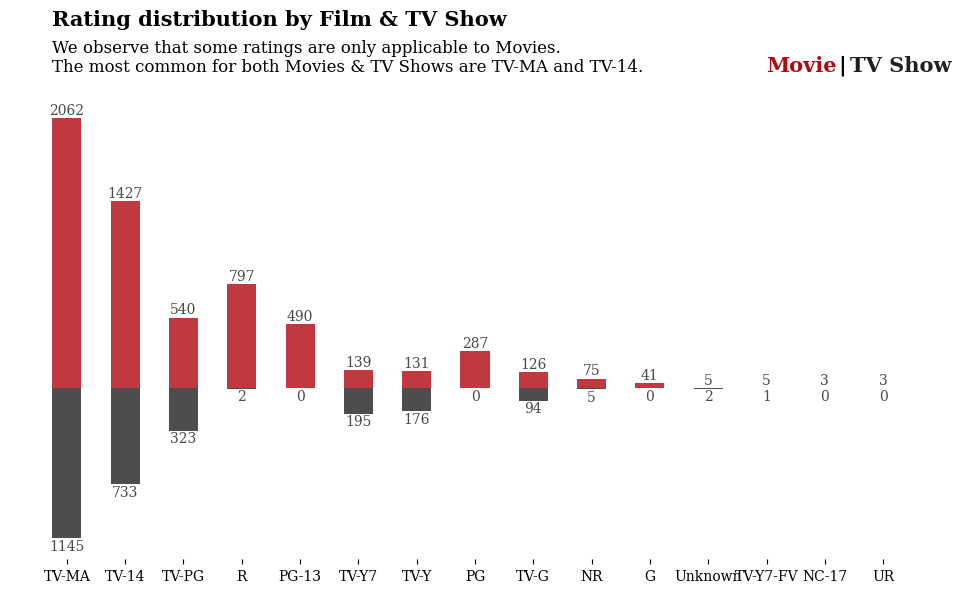

In [40]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89, 
'''We observe that some ratings are only applicable to Movies. 
The most common for both Movies & TV Shows are TV-MA and TV-14.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()

In [41]:
rating_counts = df_netflix.groupby("release_year")["rating"].value_counts().reset_index()
rating_counts

,release_year,rating,count
0,1925,TV-14,1
1,1942,TV-14,2
2,1943,TV-PG,3
3,1944,TV-14,2
4,1944,TV-PG,1
...,...,...,...
436,2021,TV-Y,26
437,2021,R,21
438,2021,TV-G,21
439,2021,PG-13,14


In [42]:
rating_counts.iloc[rating_counts['count'].idxmax()]

release_year     2018
rating          TV-MA
count             549
Name: 399, dtype: object